In [1]:
#I printed the libraries and their versions that I used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import ttest_ind
from scipy.stats import f_oneway


print(f'Pandas version is {pd.__version__}')
print(f'Numpy version is {np.__version__}')
print(f'Seaborn version is {sns.__version__}')
print(f'Matplotlib version is {plt.matplotlib.__version__}')
print(f'Scipy version is {scipy.__version__}')

Pandas version is 2.2.2
Numpy version is 1.26.4
Seaborn version is 0.13.2
Matplotlib version is 3.8.4
Scipy version is 1.13.1


In [2]:
#I imported the CSV file by identifying the function
def read_data(fname):
    df=pd.read_csv(fname)
    return df

fname='movie_metadata.csv'
df=read_data(fname)

In [3]:
#I replace the some columns name with more reasonable ones
columns = {
    'num_critic_for_reviews': 'critic_review_count',
    'duration': 'duration_minutes',
    'director_facebook_likes': 'director_fb_likes',
    'actor_3_facebook_likes': 'actor_3_fb_likes',
    'actor_1_facebook_likes': 'actor_1_fb_likes',
    'gross': 'gross_revenue',
    'num_voted_users': 'voted_users_count',
    'cast_total_facebook_likes': 'cast_total_fb_likes',
    'facenumber_in_poster': 'faces_in_poster_count',
    'movie_imdb_link': 'imdb_link',
    'num_user_for_reviews': 'user_review_count',
    'title_year': 'release_year',
    'actor_2_facebook_likes': 'actor_2_fb_likes',
    'movie_facebook_likes': 'movie_fb_likes'
}

# Applying these column names to a DataFrame in Python
df.rename(columns=columns, inplace=True)

In [4]:
#I realized the need for trimming spaces. I gave an example for this.
title_value = df.loc[4869, 'movie_title']
print("Original value:", title_value)

original_length = len(title_value)
print("Original length:", original_length)

trimmed_length = len(title_value.strip())
print("Length after trimming spaces:", trimmed_length)

#I removed any spaces in 'movie_title'
df['movie_title'] = df['movie_title'].str.strip()

Original value: Happy Valley             
Original length: 25
Length after trimming spaces: 12


In [5]:
#I converted all object-value columns to lowercase.
columns_to_lowercase = df.select_dtypes(include='object').columns
df[columns_to_lowercase] = df[columns_to_lowercase].apply(lambda x: x.str.lower())

In [6]:
#I built conditions for determining the type of genres.
conditions = [
    (df['genres'].str.contains('horror')) & (df['genres'].str.contains('romance')),
    (~df['genres'].str.contains('horror')) & (~df['genres'].str.contains('romance')),
    (df['genres'].str.contains('horror')) & (~df['genres'].str.contains('romance')),
    (df['genres'].str.contains('romance')) & (~df['genres'].str.contains('horror'))
]

values = ['unknown', 'unknown', 'horror', 'romance']
df['genres_updated'] = np.select(conditions, values)

In [7]:
# I checked duplicates rows based on critical_columns_duplicate.
differences = {}
critical_columns_duplicate= ['director_name', 'movie_title', 'release_year']
duplicated_movie_title = pd.unique(df[df.duplicated(subset=critical_columns_duplicate)]['movie_title'])

for title in duplicated_movie_title:
    subset_df = df[df['movie_title'] == title]
    reference_row = subset_df.iloc[0]
    differing_columns = []
    for col in df.columns:
        if not all(subset_df[col] == reference_row[col]):
            differing_columns.append(col)
    differences[title] = differing_columns

differences_df = pd.DataFrame([(title, cols) for title, cols in differences.items()],
                              columns=['movie_title', 'differing_columns'])
pd.options.display.max_colwidth = None
pd.set_option("display.max_rows", None)
display(differences_df)

#I dropped duplicates values by keeping first max voted_users_count
df.sort_values(by=['voted_users_count'], ascending=[False], inplace=True)
df.drop_duplicates(subset=critical_columns_duplicate, keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

,movie_title,differing_columns
0,the legend of tarzan,[]
1,the twilight saga: breaking dawn - part 2,[]
2,godzilla resurgence,"[gross_revenue, content_rating, budget]"
3,pan,"[voted_users_count, cast_total_fb_likes, actor_2_fb_likes]"
4,fantastic four,[]
5,the fast and the furious,[voted_users_count]
6,hercules,[]
7,total recall,[]
8,the avengers,[]
9,dredd,[voted_users_count]


In [8]:
#Drop NaN values on critical_columns that I selected for my analysis
critical_columns=['budget', 'gross_revenue', 'imdb_score', 'genres', 'director_name', 'actor_1_name']
df.dropna(subset=critical_columns, inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
#I calculated the number of null values for each column
null_counts = df.isnull().sum()

#I filtered to show only columns with null values
null_counts = null_counts[null_counts > 0]

#I generated the result so as to display differences
null_counts_df = pd.DataFrame(null_counts, columns=['null_count']).sort_values(by='null_count', ascending=False)
print(null_counts_df)


                       null_count
aspect_ratio                   72
content_rating                 49
plot_keywords                  31
actor_3_fb_likes                7
actor_3_name                    7
faces_in_poster_count           6
language                        4
color                           2
actor_2_name                    2
actor_2_fb_likes                2
critic_review_count             1
duration_minutes                1


In [10]:
#I found the skewness value for numerical columns so as to determine whether I choose median or mean to fill nan values
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns_with_null = numerical_columns[df[numerical_columns].isnull().any()]
skewness_info = {column: df[column].skew() for column in numerical_columns_with_null}
skewness_info_df = pd.DataFrame(list(skewness_info.items()), columns=['column', 'skewness'])
skewness_info_df

,column,skewness
0,critic_review_count,1.455411
1,duration_minutes,2.347947
2,actor_3_fb_likes,6.623984
3,faces_in_poster_count,4.870509
4,actor_2_fb_likes,9.446795
5,aspect_ratio,15.963330


In [11]:
#I filled numerical nan-value cells with median because of skewness (skewness>1)
df['aspect_ratio'] = df['aspect_ratio'].fillna(df['aspect_ratio'].median())  
df['faces_in_poster_count'] = df['faces_in_poster_count'].fillna(df['faces_in_poster_count'].median())
df['critic_review_count'] = df['critic_review_count'].fillna(df['critic_review_count'].median())
df['duration_minutes'] = df['duration_minutes'].fillna(df['duration_minutes'].median())
df['actor_3_fb_likes'] = df['actor_3_fb_likes'].fillna(df['actor_3_fb_likes'].median())
df['actor_2_fb_likes'] = df['actor_2_fb_likes'].fillna(df['actor_2_fb_likes'].median())

#I filled categorical nan-value cells with 'unknown'
df['content_rating'] = df['content_rating'].fillna('unknown')
df['plot_keywords'] = df['plot_keywords'].fillna('unknown')
df['actor_3_name'] = df['actor_3_name'].fillna('unknown')
df['language'] = df['language'].fillna('unknown')
df['color'] = df['color'].fillna('unknown')
df['actor_2_name'] = df['actor_2_name'].fillna('unknown')

In [12]:
#I created the new columns for profit and profit percentage
df['profit'] = df['gross_revenue'] - df['budget']
df['profit_percentage'] = (df['profit'] / df['budget']) * 100
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3787 entries, 0 to 3786
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   color                  3787 non-null   object 
 1   director_name          3787 non-null   object 
 2   critic_review_count    3787 non-null   float64
 3   duration_minutes       3787 non-null   float64
 4   director_fb_likes      3787 non-null   float64
 5   actor_3_fb_likes       3787 non-null   float64
 6   actor_2_name           3787 non-null   object 
 7   actor_1_fb_likes       3787 non-null   float64
 8   gross_revenue          3787 non-null   float64
 9   genres                 3787 non-null   object 
 10  actor_1_name           3787 non-null   object 
 11  movie_title            3787 non-null   object 
 12  voted_users_count      3787 non-null   int64  
 13  cast_total_fb_likes    3787 non-null   int64  
 14  actor_3_name           3787 non-null   object 
 15  face

In [13]:
#I updated country column with non-sense values
non_country_terms = ["Official Site", "New Line"]
mode_country = df['country'].mode()[0]

df['country'] = df['country'].replace(non_country_terms, mode_country)
df['country'] = df['country'].replace("West Germany", "Germany")

In [14]:
#I obtained 1225 entries for only horror and romance genres.
df_romantic_horror = df[(df['genres_updated'] == 'horror') | (df['genres_updated'] == 'romance')]
df_romantic_horror.reset_index(drop=True, inplace=True)

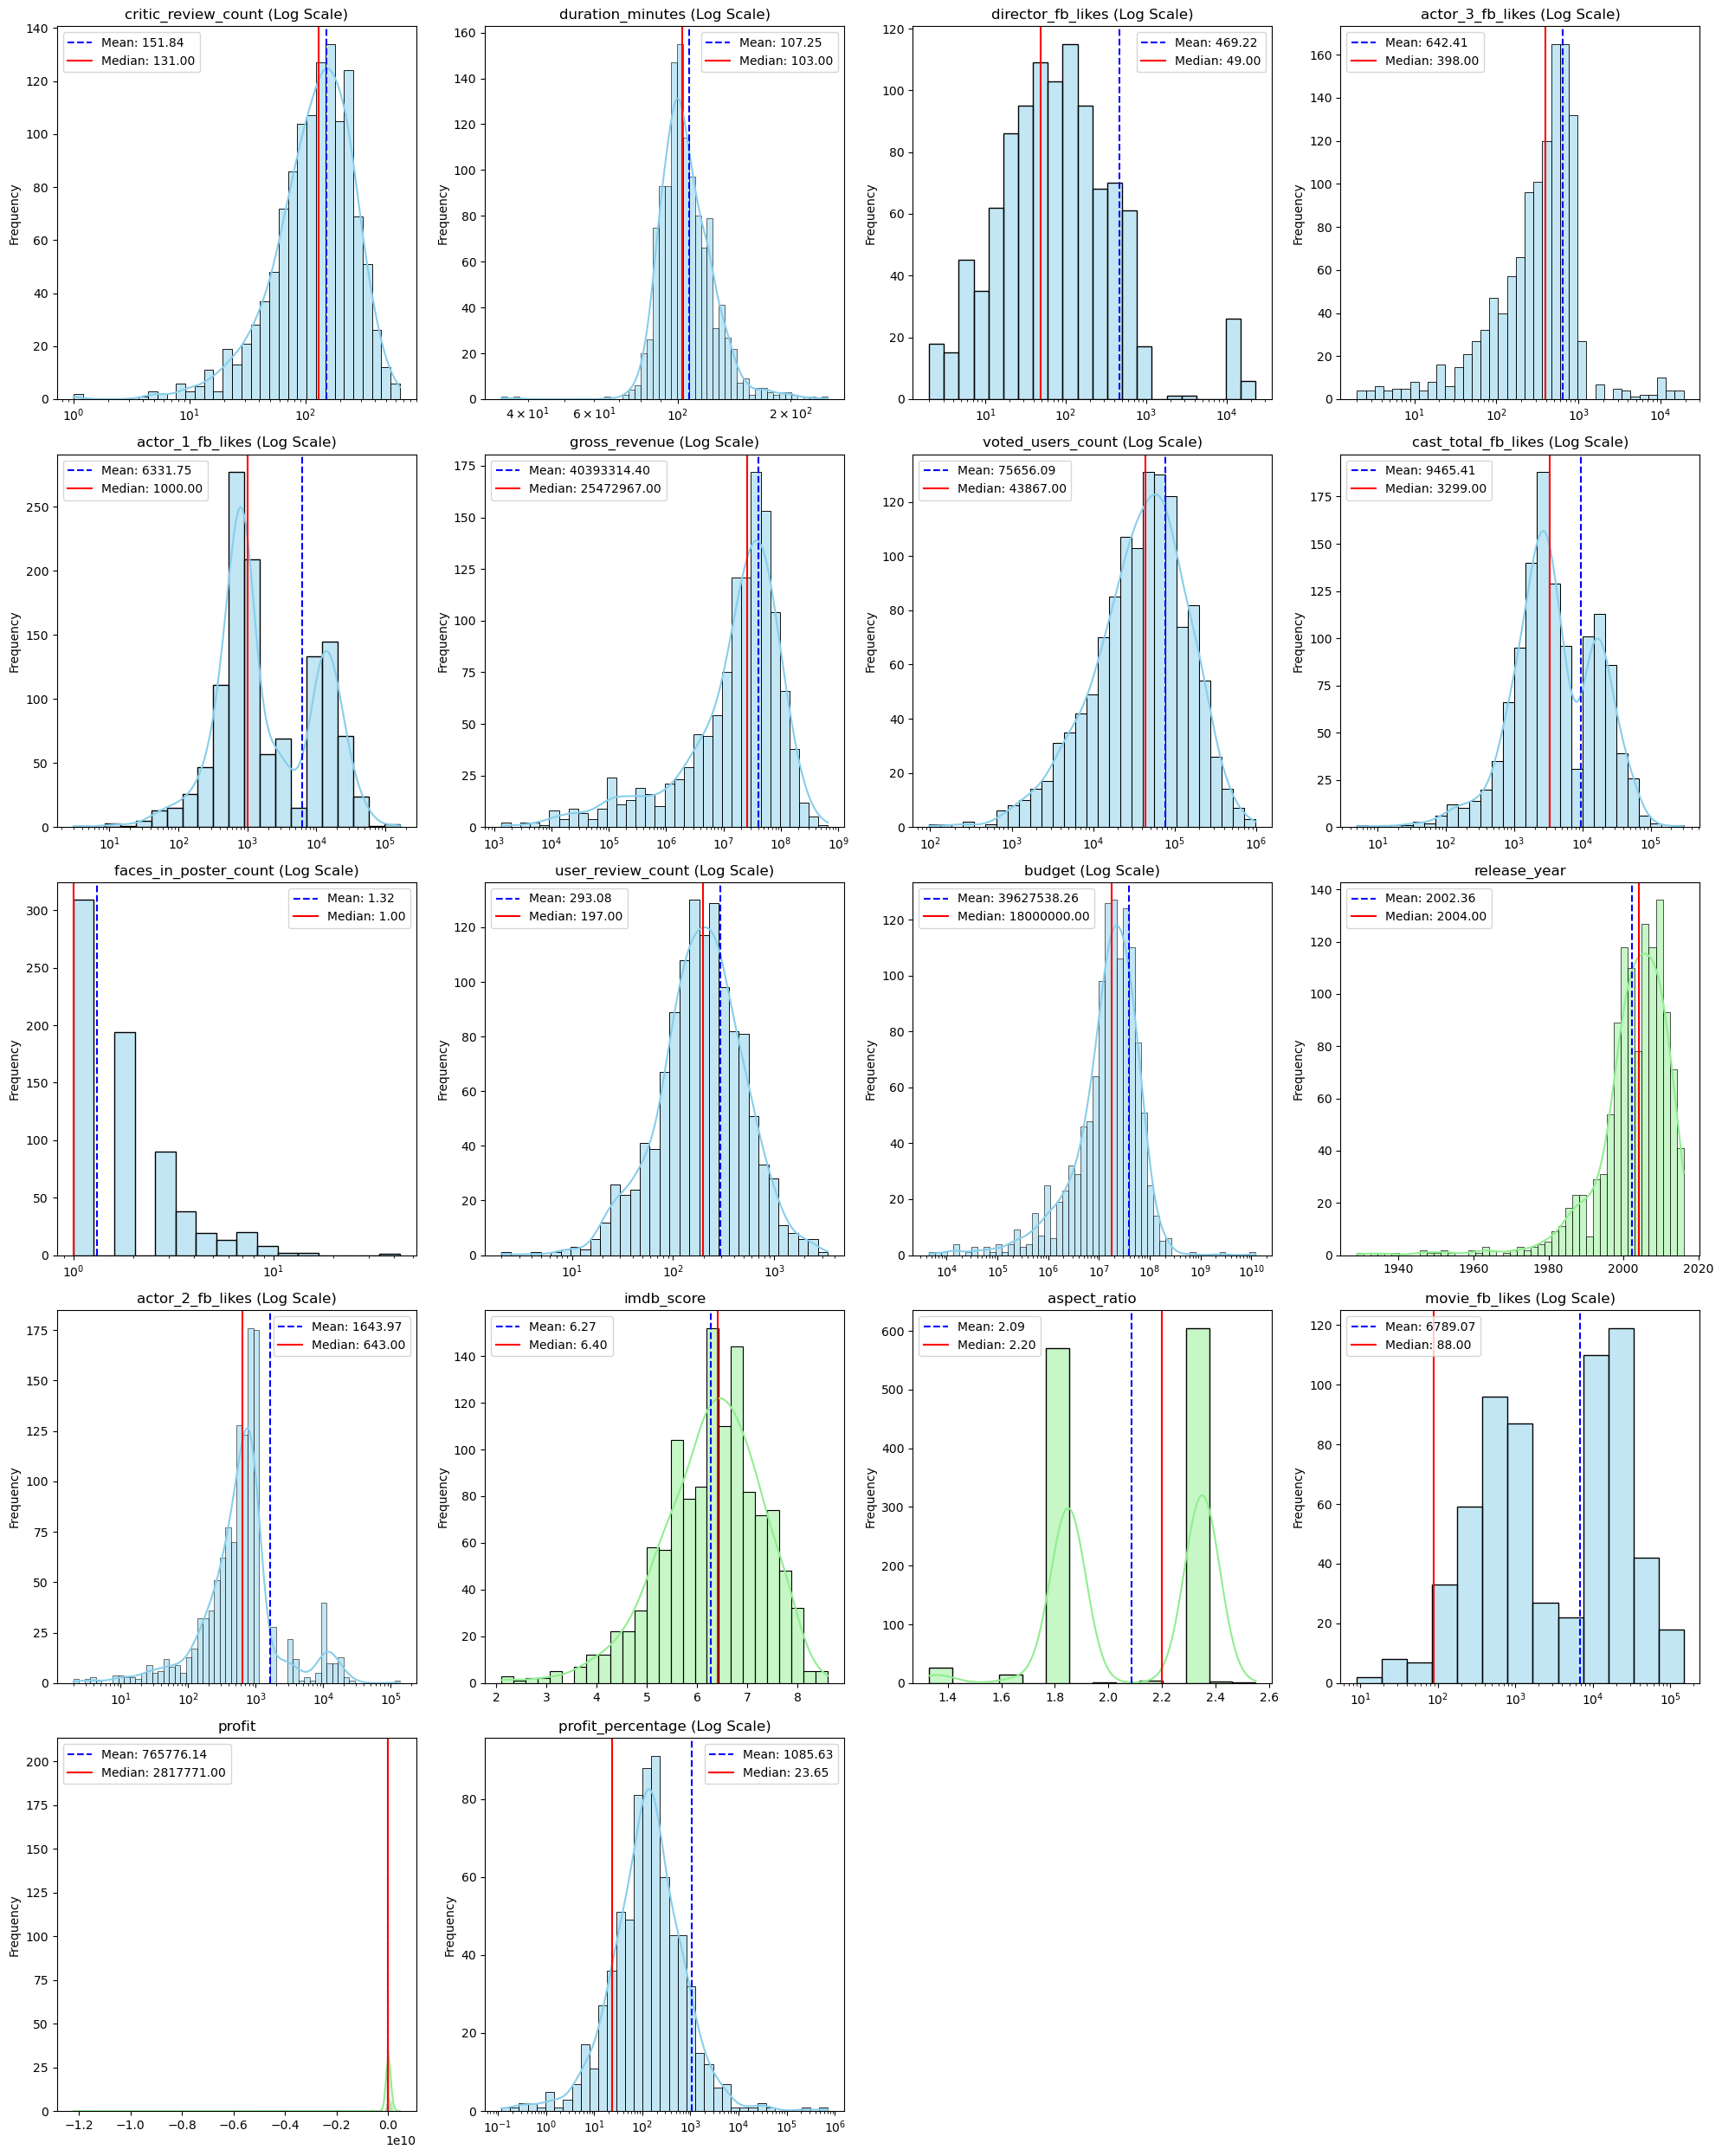

In [15]:
# I plotted the numerical columns for their distributions - just calculated for romance & horror
numeric_df_romantic_horror = df_romantic_horror.select_dtypes(include=['float64', 'int64'])
columns_to_plot = numeric_df_romantic_horror.columns

#I defined grid layout
n_cols = 4
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

#I create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

# I ploted each column with enhancements
for i, col in enumerate(columns_to_plot):
    # Check if log scale is needed based on skewness
    if df_romantic_horror[col].skew() > 1:
        sns.histplot(df_romantic_horror[col], ax=axes[i], kde=True, log_scale=(True, False), color='skyblue')
        axes[i].set_title(f"{col} (Log Scale)")
    else:
        sns.histplot(df_romantic_horror[col], ax=axes[i], kde=True, color='lightgreen')
        axes[i].set_title(col)
    
    #I added mean and median lines
    mean = df_romantic_horror[col].mean()
    median = df_romantic_horror[col].median()
    axes[i].axvline(mean, color='blue', linestyle='--', label=f"Mean: {mean:.2f}")
    axes[i].axvline(median, color='red', linestyle='-', label=f"Median: {median:.2f}")
    
    #I add legend and labels
    axes[i].legend()
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")

#I hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [16]:
#I calculated the some statistic values for determining outliers - just for romance & horror
summary_stats = {
    'Mean': numeric_df_romantic_horror.mean(),
    'Median': numeric_df_romantic_horror.median(),
    'Variance': numeric_df_romantic_horror.var(),
    'Standard Deviation': numeric_df_romantic_horror.std(),
    'Skewness': numeric_df_romantic_horror.skew(),
    'Kurtosis': numeric_df_romantic_horror.kurtosis()
}

#I converted to DataFrame to display
summary_stats_df = pd.DataFrame(summary_stats)
display(summary_stats_df)

,Mean,Median,Variance,Standard Deviation,Skewness,Kurtosis
critic_review_count,1.518376e+02,1.310000e+02,1.055409e+04,1.027331e+02,1.256520,2.156085
duration_minutes,1.072469e+02,1.030000e+02,3.738575e+02,1.933539e+01,1.899445,7.680080
director_fb_likes,4.692212e+02,4.900000e+01,4.607767e+06,2.146571e+03,6.560385,45.627207
actor_3_fb_likes,6.424114e+02,3.980000e+02,2.500868e+06,1.581413e+03,7.337657,59.344273
actor_1_fb_likes,6.331754e+03,1.000000e+03,1.194424e+08,1.092897e+04,5.271646,55.196193
gross_revenue,4.039331e+07,2.547297e+07,2.802571e+15,5.293932e+07,3.681974,24.389022
voted_users_count,7.565609e+04,4.386700e+04,9.424210e+09,9.707837e+04,3.328830,17.426320
cast_total_fb_likes,9.465410e+03,3.299000e+03,2.456422e+08,1.567298e+04,7.268038,108.528013
faces_in_poster_count,1.318367e+00,1.000000e+00,4.700847e+00,2.168144e+00,7.340073,115.672577
user_review_count,2.930824e+02,1.970000e+02,1.055701e+05,3.249156e+02,3.514277,18.575818


In [17]:
#I cleaned outliers
skewness = df_romantic_horror['voted_users_count'].skew()
if skewness < 1:
    lower_percentile = 0.05
elif skewness < 3:
    lower_percentile = 0.10
else:
    lower_percentile = 0.25
lower_bound = df_romantic_horror['voted_users_count'].quantile(lower_percentile)

print(f"Selected lower percentile: {lower_percentile*100}%")
print(f"Calculated lower bound based on selected percentile: {lower_bound}")
df_romantic_horror = df_romantic_horror[df_romantic_horror['voted_users_count'] >= lower_bound]

clip_columns = ['critic_review_count', 'duration_minutes','faces_in_poster_count', 'user_review_count', 'profit_percentage']
for col in clip_columns:
    upper_limit = df_romantic_horror[col].quantile(0.95)
    df_romantic_horror.loc[:, col] = np.clip(df_romantic_horror[col], None, upper_limit)


Selected lower percentile: 25.0%
Calculated lower bound based on selected percentile: 16863.0


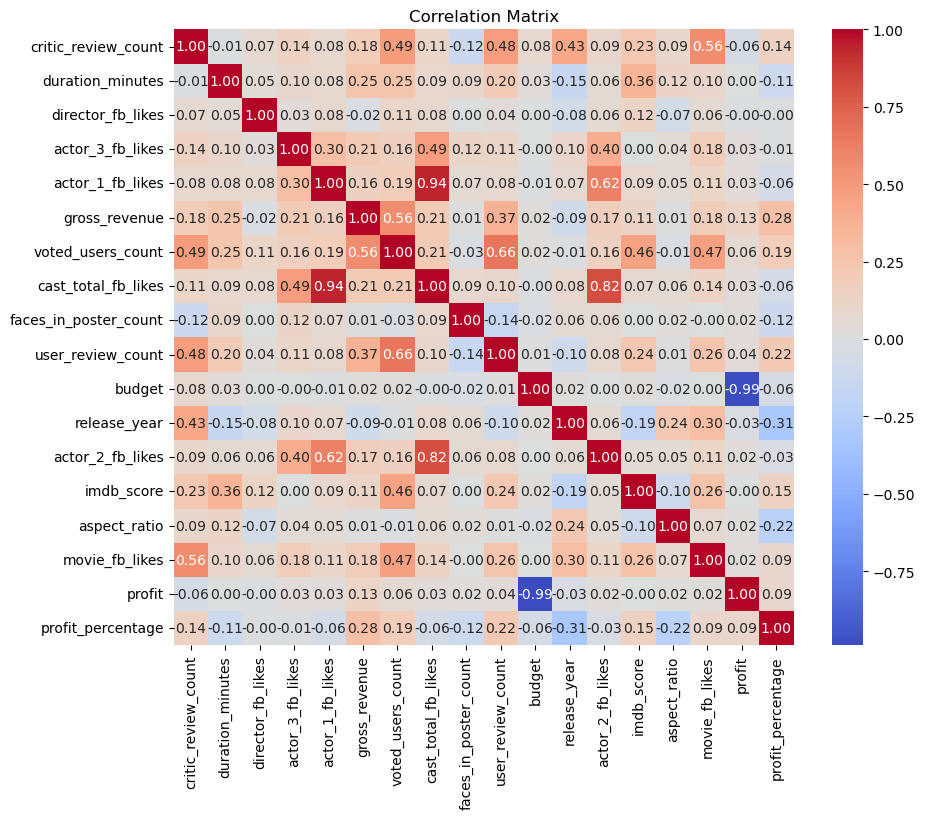

In [18]:
#I generated correlation matrix using numerical columns
numeric_df_romantic_horror = df_romantic_horror.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df_romantic_horror.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

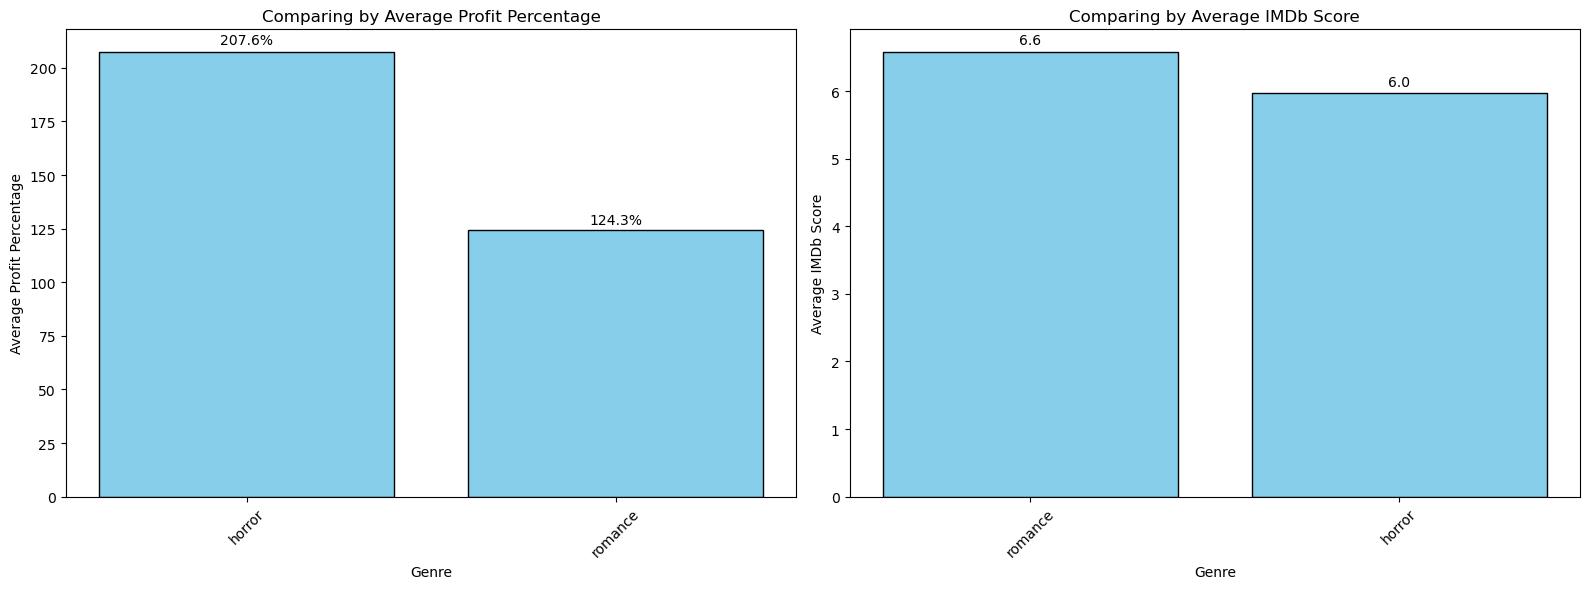

In [19]:
#I compared horror and romance genres based on average profit percentage
profit_percentage = df_romantic_horror.groupby('genres_updated')['profit_percentage'].mean().nlargest(5)

#I compared horror and romance genres based on average imdb score
imdb_score = df_romantic_horror.groupby('genres_updated')['imdb_score'].mean().nlargest(5)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

#Profit
axes[0].bar(profit_percentage.index, profit_percentage.values, color='skyblue', edgecolor='black')
axes[0].set_title('Comparing by Average Profit Percentage')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Average Profit Percentage')
axes[0].tick_params(axis='x', rotation=45)

for i, value in enumerate(profit_percentage):
    axes[0].text(i, value * 1.01, f"{value:.1f}%", ha='center', va='bottom')

#Imdb
axes[1].bar(imdb_score.index, imdb_score.values, color='skyblue', edgecolor='black')
axes[1].set_title('Comparing by Average IMDb Score')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Average IMDb Score')
axes[1].tick_params(axis='x', rotation=45)

for i, value in enumerate(imdb_score):
    axes[1].text(i, value * 1.01, f"{value:.1f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [20]:
#I filtered profit and IMDb scores for Romance and Horror genres
romance_profit_percentage = df_romantic_horror[df_romantic_horror['genres_updated'] == 'romance']['profit_percentage']
horror_profit_percentage = df_romantic_horror[df_romantic_horror['genres_updated'] == 'horror']['profit_percentage']

romance_imdb_scores = df_romantic_horror[df_romantic_horror['genres_updated'] == 'romance']['imdb_score']
horror_imdb_scores = df_romantic_horror[df_romantic_horror['genres_updated'] == 'horror']['imdb_score']

#I applied two-tailed t-test for profit percentage
profit_percentage_ttest_result = ttest_ind(romance_profit_percentage, horror_profit_percentage, equal_var=False)

#I applied two-tailed t-test for IMDb scores
imdb_ttest_result = ttest_ind(romance_imdb_scores, horror_imdb_scores, equal_var=False)

print("Two-tailed t-test for Profits Percentage:")
print("t-statistic:", profit_percentage_ttest_result.statistic)
print("p-value:", profit_percentage_ttest_result.pvalue)

print("\nTwo-tailed t-test for IMDb Scores:")
print("t-statistic:", imdb_ttest_result.statistic)
print("p-value:", imdb_ttest_result.pvalue)

Two-tailed t-test for Profits Percentage:
t-statistic: -3.7561992240855204
p-value: 0.00019334369354161797

Two-tailed t-test for IMDb Scores:
t-statistic: 9.101750472437685
p-value: 1.3715223727497938e-18


In [21]:
# Group by director and actor, and calculate mean profit percentage and IMDB score - horror
horror_data = df_romantic_horror[df_romantic_horror['genres_updated'] == 'horror']
profit_percentage_mean_horror = horror_data['profit_percentage'].mean()


top_horror_directors_pp = horror_data.groupby('director_name')[['profit_percentage', 'imdb_score']].mean().sort_values(by=['imdb_score', 'profit_percentage'], ascending=False)
top_horror_actors_pp = horror_data.groupby('actor_1_name')[['profit_percentage', 'imdb_score']].mean().sort_values(by=['imdb_score', 'profit_percentage'], ascending=False)


positive_profit_directors_horror = top_horror_directors_pp[top_horror_directors_pp['profit_percentage'] > profit_percentage_mean_horror].head(5)
positive_profit_actors_horror = top_horror_actors_pp[top_horror_actors_pp['profit_percentage'] > profit_percentage_mean_horror].head(5)

positive_profit_directors_horror, positive_profit_actors_horror

(                  profit_percentage  imdb_score
 director_name                                  
 jonathan demme           588.036842         8.6
 alfred hitchcock        1030.684389         8.5
 ridley scott             617.272727         8.5
 william friedkin        1030.684389         8.0
 edgar wright             236.609700         8.0,
                     profit_percentage  imdb_score
 actor_1_name                                     
 janet leigh               1030.684389         8.5
 tom skerritt               617.272727         8.5
 ellen burstyn             1030.684389         8.0
 peter serafinowicz         236.609700         8.0
 shane black                298.236987         7.8)

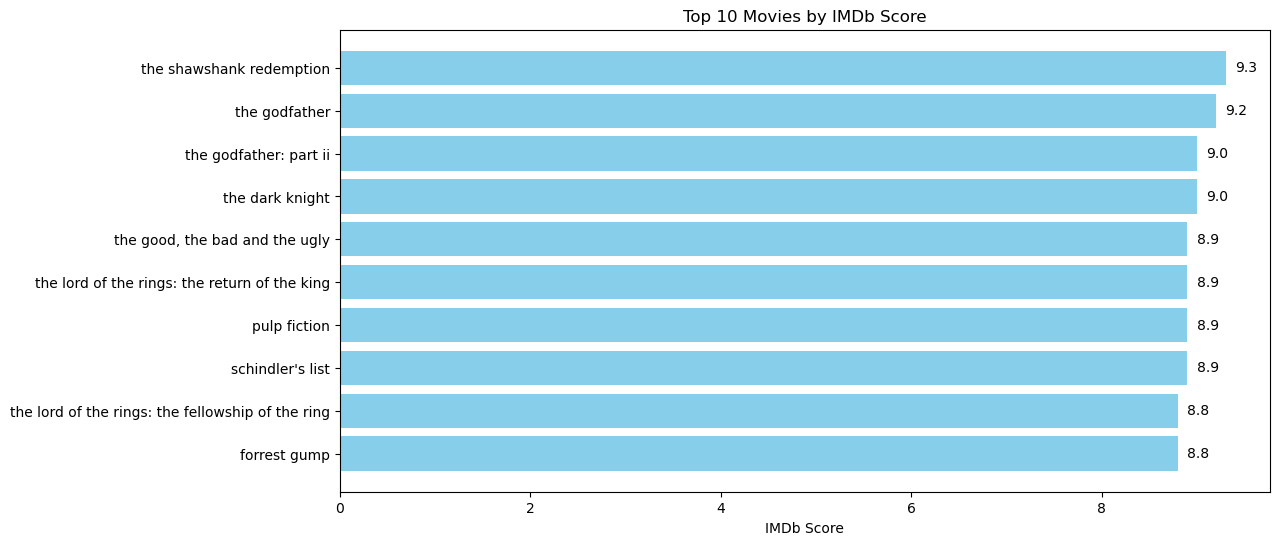

In [22]:
#I generated plot for top 10 movies by IMDb score
top_10_movies = df[['movie_title', 'imdb_score']].sort_values(by='imdb_score', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_movies['movie_title'], top_10_movies['imdb_score'], color='skyblue')
plt.xlabel("IMDb Score")
plt.title("Top 10 Movies by IMDb Score")
plt.gca().invert_yaxis()

for bar, score in zip(bars, top_10_movies['imdb_score']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f"{score:.1f}", va='center')

plt.show()

Top 5 Genres with Most Movies:
genres
drama       1914
comedy      1492
thriller    1087
action       935
romance      868
Name: count, dtype: int64


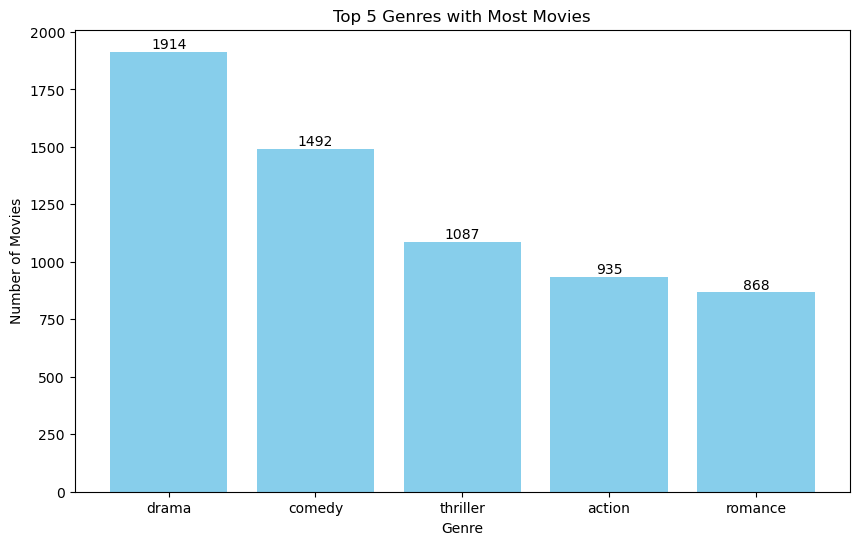


Summary Statistics for Drama:
  Mean IMDb Score: 6.79
  Median IMDb Score: 6.90
  Standard Deviation: 0.89
  Number of Movies: 1914

Summary Statistics for Comedy:
  Mean IMDb Score: 6.18
  Median IMDb Score: 6.30
  Standard Deviation: 1.04
  Number of Movies: 1492

Summary Statistics for Thriller:
  Mean IMDb Score: 6.37
  Median IMDb Score: 6.40
  Standard Deviation: 0.97
  Number of Movies: 1087

Summary Statistics for Action:
  Mean IMDb Score: 6.29
  Median IMDb Score: 6.30
  Standard Deviation: 1.04
  Number of Movies: 935

Summary Statistics for Romance:
  Mean IMDb Score: 6.42
  Median IMDb Score: 6.50
  Standard Deviation: 0.97
  Number of Movies: 868


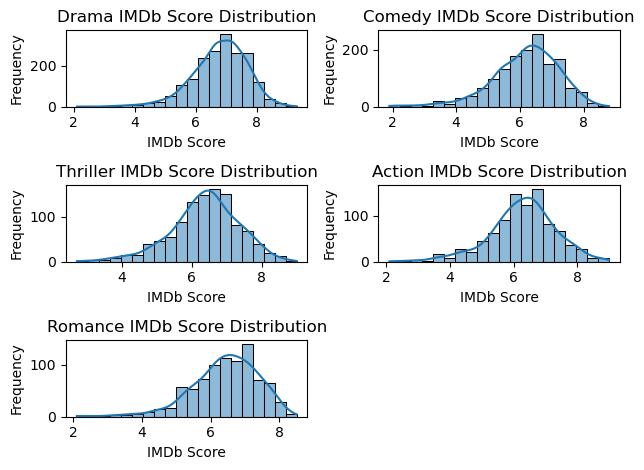

In [23]:
#I calculated top 5 genres by movie count
top_5_genres = df['genres'].str.split('|').explode().value_counts().head(5)
print("Top 5 Genres with Most Movies:")
print(top_5_genres)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_genres.index, top_5_genres.values, color='skyblue')
plt.title("Top 5 Genres with Most Movies")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")

for bar, value in zip(bars, top_5_genres.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{value}", ha='center', va='bottom')

plt.show()

#Additional information
for i, genre in enumerate(top_5_genres.index, 1):
    genre_df = df[df['genres'].str.contains(genre, case=False, na=False)]
    
    mean_score = genre_df['imdb_score'].mean()
    median_score = genre_df['imdb_score'].median()
    std_dev = genre_df['imdb_score'].std()
    count = len(genre_df)
    
    print(f"\nSummary Statistics for {genre.capitalize()}:")
    print(f"  Mean IMDb Score: {mean_score:.2f}")
    print(f"  Median IMDb Score: {median_score:.2f}")
    print(f"  Standard Deviation: {std_dev:.2f}")
    print(f"  Number of Movies: {count}")
    
    plt.subplot(3, 2, i)
    sns.histplot(genre_df['imdb_score'], bins=20, kde=True)
    plt.title(f"{genre.capitalize()} IMDb Score Distribution")
    plt.xlabel("IMDb Score")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
